In [1]:
# Análise de regressão no R
# Rodolfo Souza - rodolfomssouza@gmail.com
# R notebook com comandos de análise de regressão do curso

In [2]:
# options(repr.plot.width=5, repr.plot.height=5)

In [3]:
# Regressão linear --------------------------------------------------------

# Dados para análise ------------------------------------------------------
# Dados de Souza et al. (2017); doi: 10.1016/j.geodrs.2017.07.008

# Umidade disponível no solo
cad = c(0.106, 0.117, 0.141, 0.124, 0.110, 0.102, 0.134, 0.154, 0.114,
        0.126, 0.130, 0.193, 0.169, 0.122, 0.115, 0.098, 0.058, 0.139,
        0.126, 0.116, 0.112, 0.092, 0.086, 0.126, 0.131, 0.105, 0.098,
        0.150, 0.131, 0.119)

# Índice S
idS = c(0.0218, 0.0262, 0.0242, 0.0248, 0.0196, 0.0244, 0.0250, 0.0230,
        0.0193, 0.0225, 0.0275, 0.0331, 0.0365, 0.0229, 0.0225, 0.0237,
        0.0119, 0.0299, 0.0257, 0.0210, 0.0233, 0.0151, 0.0133, 0.0252,
        0.0255, 0.0191, 0.0182, 0.0351, 0.0246, 0.0214)

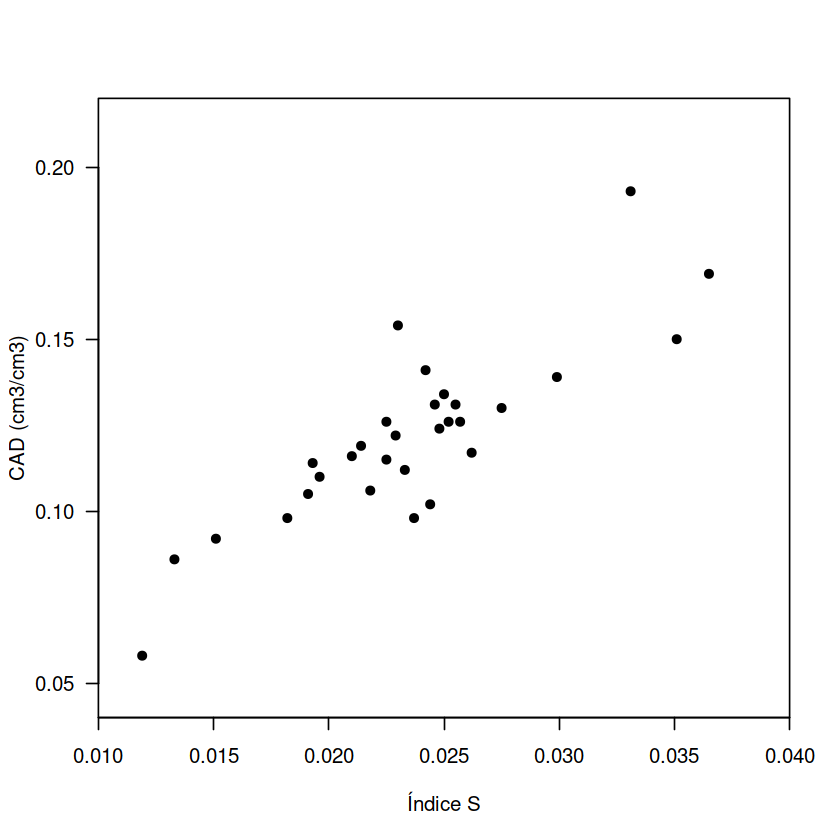

In [4]:
# Gráfico de dispersão ----------------------------------------------------
par(las=1, xaxs='i', yaxs='i')  # Configurações gerais

# Gráfico
plot(idS, cad, pch=16, xlab='Índice S', ylab='CAD (cm3/cm3)',
    xlim=c(0.010, 0.040), ylim=c(0.04, 0.22))

In [5]:
# Os dados parecem ter uma relação linear
# Ajustar uma regressão linear:
# y = a + bX
# a é o coeficiente de interceptação (Intercept)
# b é o coefciente de inclinação

In [6]:
# Regressão ---------------------------------------------------------------
# Ajuste regressão linear
reg1 = lm(cad~idS)

# Resumo da regressão
summary(reg1)


Call:
lm(formula = cad ~ idS)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.024084 -0.007394 -0.000478  0.005249  0.034674 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.02872    0.01110   2.588   0.0151 *  
idS          3.93926    0.45941   8.575 2.56e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01366 on 28 degrees of freedom
Multiple R-squared:  0.7242,	Adjusted R-squared:  0.7143 
F-statistic: 73.52 on 1 and 28 DF,  p-value: 2.556e-09


In [7]:
# Comentários do ajuste ---------------------------------------------------
# A regressão foi significativa, pois "Pr(>|t|)" do idS (x) foi menor do
# que a probabilidade de interesse, ou seja, 0,01.
# O coeficiente de determinação (R2) do ajuste foi de 0,7242.

In [8]:
# Extraindo os parâmetros do ajuste ---------------------------------------
# Coeficientes
cfreg1 = coefficients(reg1)
r2reg1 = round(summary(reg1)$r.squared, digits = 4)

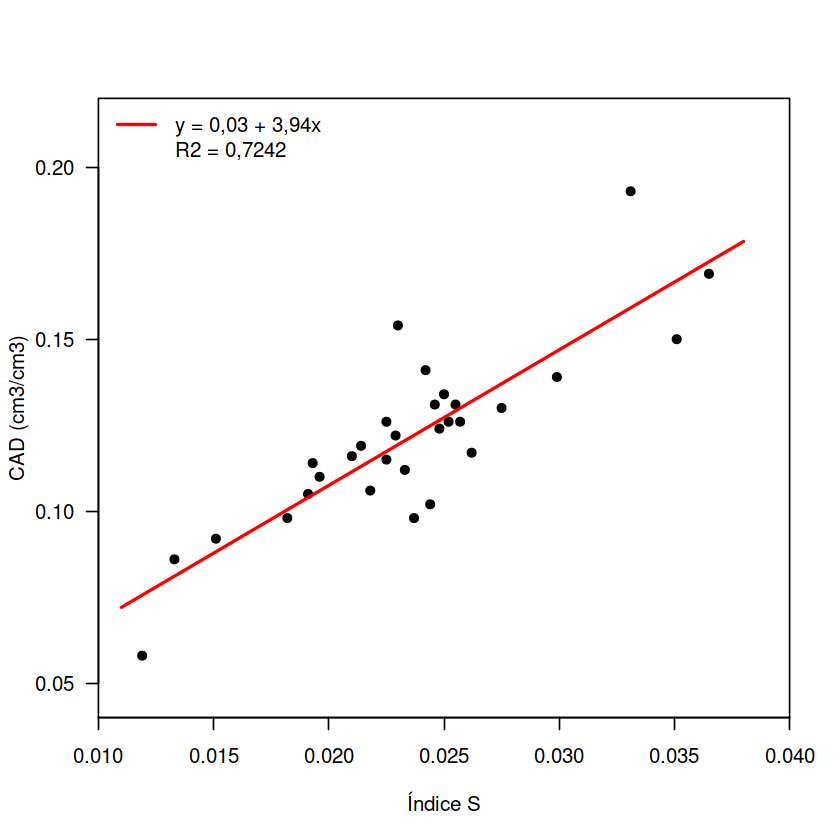

In [9]:
# Gráfico com linha de regressão ajustada ---------------------------------

# Configurações do gráfico
par(las=1, xaxs='i', yaxs='i')

# Gráfico
plot(idS, cad, pch=16, xlab='Índice S', ylab='CAD (cm3/cm3)',
    xlim=c(0.010, 0.040), ylim=c(0.04, 0.22))

# Linha de regressão
curve(cfreg1[1]+cfreg1[2]*x, add=T, lwd=2, col='red',
     from=0.011, to=0.038)

# Legenda
legend('topleft', legend=c('y = 0,03 + 3,94x', 'R2 = 0,7242'),
       col=c('red', NA), lwd=c(2, NA), bty='n')

In [10]:
# Regressão polinomial (2° grau) ------------------------------------------

# Dados de Souza et al. (2016); doi: 10.1002/hyp.10953

# Índice de sazonalidade da chuva
sk = c(0.696, 0.545, 0.198, 0.641, 1.164, 0.492, 0.494,
       0.695, 0.487, 0.909, 0.525, 0.343)

# NDVI médio anual da caatinga em São João
ndvi = c(0.747, 0.772, 0.671, 0.734, 0.741, 0.724, 0.750,
         0.738, 0.740, 0.771, 0.728, 0.726)

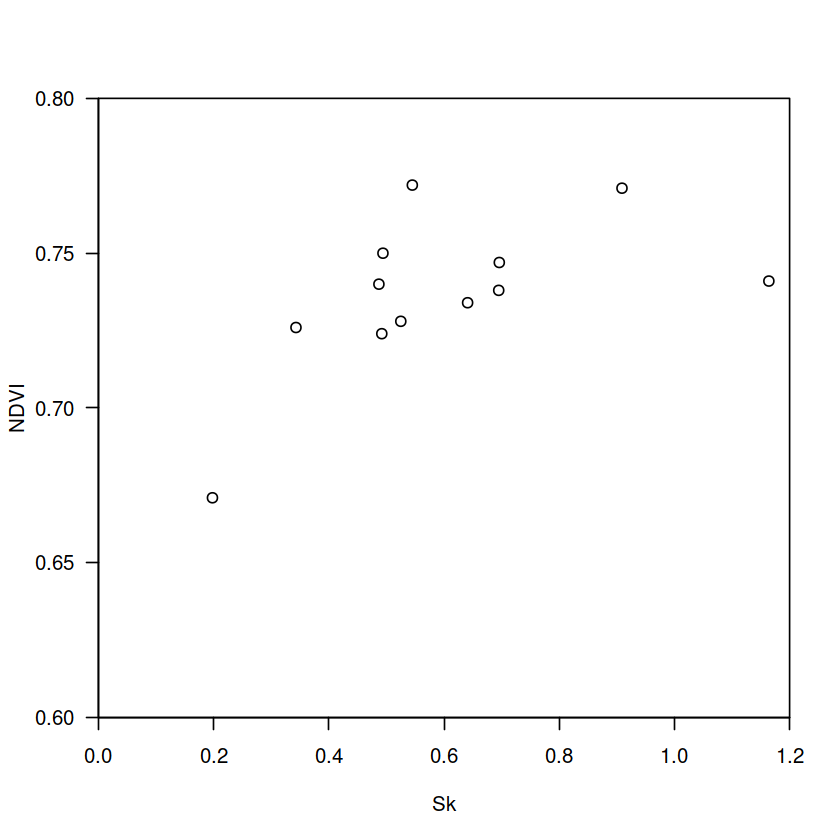

In [11]:
# Gráfico de dispersão ----------------------------------------------------
par(las=1, xaxs='i', yaxs='i')  # Configurações gerais

# Gráfico
plot(sk, ndvi, xlab='Sk', ylab='NDVI', xlim=c(0, 1.2), ylim=c(0.6, 0.8))

In [12]:
# Os dados parecem ter uma relação quadrática, onde y aumenta com o aumento x
# até certo ponto, em seguida tende a decrescer.
# Ajustar uma regressão quadrática:
# y = a + bX + cX^2

In [13]:
# Regressão ---------------------------------------------------------------
# Ajuste modelo quadrático
reg2 = lm(ndvi~sk+I(sk^2))

# Resumo da regressão
summary(reg2)


Call:
lm(formula = ndvi ~ sk + I(sk^2))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.016843 -0.011590 -0.004019  0.012923  0.030085 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.62873    0.02741  22.941  2.7e-09 ***
sk           0.30517    0.08433   3.619  0.00558 ** 
I(sk^2)     -0.17889    0.05953  -3.005  0.01483 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01661 on 9 degrees of freedom
Multiple R-squared:  0.6652,	Adjusted R-squared:  0.5908 
F-statistic:  8.94 on 2 and 9 DF,  p-value: 0.007271


In [14]:
# Comentários do ajuste ---------------------------------------------------
# A regressão foi significativa, pois "Pr(>|t|)" do sk^2 (x) foi menor do
# que a probabilidade de interesse, ou seja, 0,05.
# O coeficiente de determinação (R2) do ajuste foi de 0,6652.

In [15]:
# Extraindo os parâmetros do ajuste ---------------------------------------
# Coeficientes
cfreg2 = coefficients(reg2)
r2reg2 = round(summary(reg2)$r.squared, digits = 4)
#cfreg2

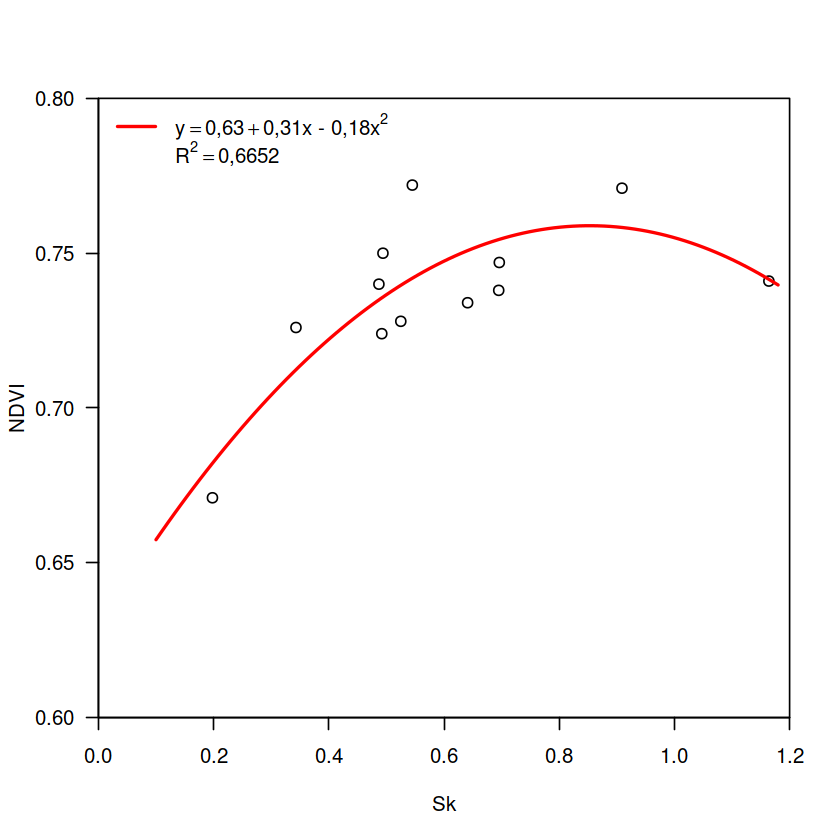

In [16]:
# Gráfico com linha de regressão ajustada ---------------------------------

# Configurações do gráfico
par(las=1, xaxs='i', yaxs='i')

# Gráfico
plot(sk, ndvi, xlab='Sk', ylab='NDVI', xlim=c(0, 1.2), ylim=c(0.6, 0.8))

# Linha de regressão
curve(cfreg2[1]+cfreg2[2]*x+cfreg2[3]*x^2, add=T, lwd=2, col='red',
     from=0.1, to=1.18)

# Legenda
#legend('topleft', legend=c('y = 0,63 + 0,31x - 0,18x^2', 'R2 = 0,6652'),
#       col=c('red', NA), lwd=c(2, NA), bty='n')

# Legenda
# Utilizando "expression" para expressões matemáticas
legend('topleft', legend=c(expression(y=='0,63'+'0,31'*x*' - 0,18'*x^2),
                           expression(R^{2}==0*','*6652)),
       col=c('red', NA), lwd=c(2, NA), bty='n')

In [17]:
# Regressão logarítmica ---------------------------------------------------

# Dados de Almeida et al. (2017); doi: 10.1590/S0100-204X2017000600001

# Erosividade da média mensal da chuva no semiárido brasileiro (MJ mm/ha/mês)
ero = c(357.38, 329.31, 482.57, 368.86, 209.44, 159.12, 127.89, 76.08,
        57.89, 128.87, 309.97, 380.66)

# Alcance da dependência espacial (km)
alc = c(1508.39, 914.11, 789.16, 831.82, 762.8, 700.13, 439.12, 431.07,
        308.55, 62.18, 614.76, 1038.91)

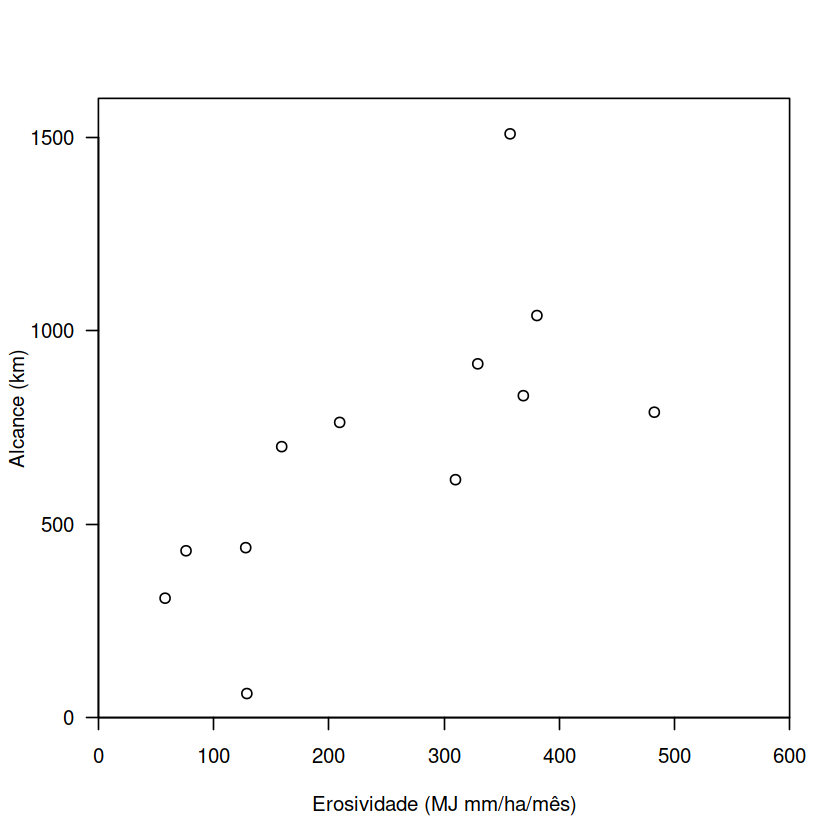

In [18]:
# Gráfico de dispersão ----------------------------------------------------
par(las=1, xaxs='i', yaxs='i')  # Configurações gerais

# Gráfico
plot(ero, alc, xlab='Erosividade (MJ mm/ha/mês)', ylab='Alcance (km)',
     xlim=c(0, 600), ylim=c(0, 1600))

In [19]:
# Os dados parecem ter uma relação logarítmica, onde y aumenta com o aumento x
# até certo ponto, em seguida tende a permanecer "constante".
# Ajustar uma regressão logarítmica:
# y = a + b*log(X)

In [20]:
# Regressão ---------------------------------------------------------------
# Ajuste modelo logarítmico
reg3 = lm(alc~log(ero))

# Resumo da regressão
summary(reg3)


Call:
lm(formula = alc ~ log(ero))

Residuals:
    Min      1Q  Median      3Q     Max 
-452.95 -133.27   43.79  103.57  592.76 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -1392.7      638.5  -2.181  0.05414 . 
log(ero)       392.6      118.9   3.303  0.00798 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 272.4 on 10 degrees of freedom
Multiple R-squared:  0.5217,	Adjusted R-squared:  0.4739 
F-statistic: 10.91 on 1 and 10 DF,  p-value: 0.007976


In [21]:
# Comentários do ajuste ---------------------------------------------------
# A regressão foi significativa, pois "Pr(>|t|)" do log(ero) (x) foi menor do
# que a probabilidade de interesse, ou seja, 0,01.
# O coeficiente de determinação (R2) do ajuste foi de 0,5217.

In [22]:
# Extraindo os parâmetros do ajuste ---------------------------------------
# Coeficientes
cfreg3 = coefficients(reg3)
r2reg3 = round(summary(reg3)$r.squared, digits = 4)
#cfreg3

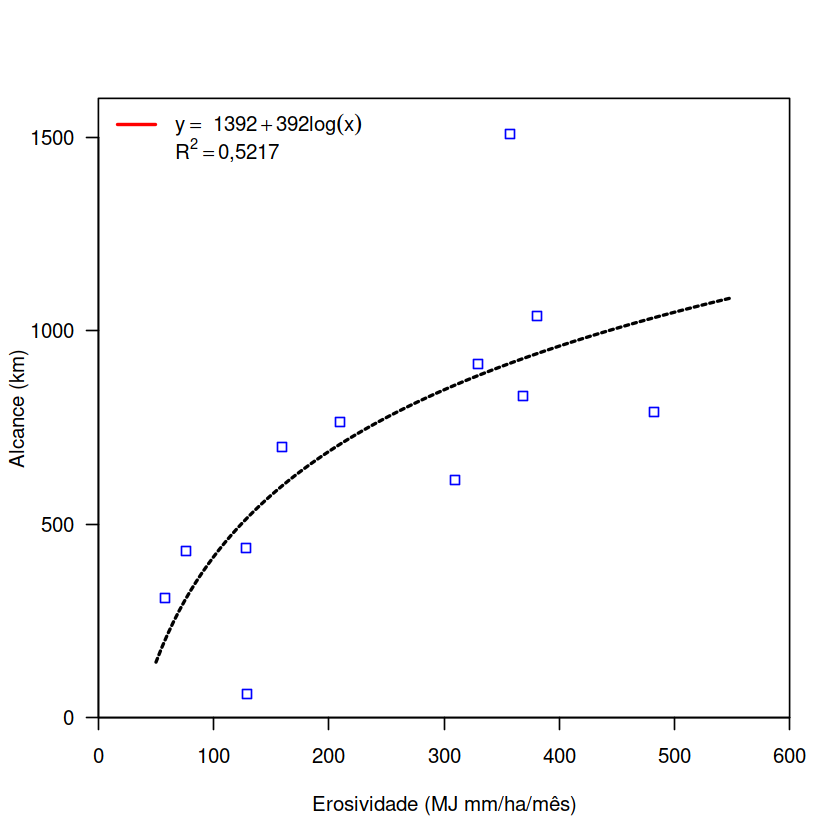

In [23]:
# Gráfico com linha de regressão ajustada ---------------------------------

# Configurações do gráfico
par(las=1, xaxs='i', yaxs='i')

# Gráfico
plot(ero, alc, xlab='Erosividade (MJ mm/ha/mês)', ylab='Alcance (km)',
     xlim=c(0, 600), ylim=c(0, 1600), pch=0, col='blue')

# Linha de regressão
curve(cfreg3[1]+cfreg3[2]*log(x), add=T, lwd=2, col='black',
     lty=2, from=50, to=550)

# Legenda
legend('topleft', legend=c(expression(y==-1392+392*log(x)),
                           expression(R^{2}=='0,5217')),
       col=c('red', NA), lwd=c(2, NA), bty='n')